<a href="https://colab.research.google.com/github/HeartByte/DataScienece_Miniproject/blob/master/HoJeong_Olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project for Data Science

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [0]:
olympic_data = pd.read_csv("drive/My Drive/data/athlete_events.csv")
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [0]:
region_data = pd.read_csv("drive/My Drive/data/noc_regions.csv")
region_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [0]:
type(olympic_data)
print("Data Dims: ", olympic_data.shape)

Data Dims:  (271116, 15)


In [0]:
Medal_data = pd.DataFrame(olympic_data["Medal"])
Age_data = pd.DataFrame(olympic_data["Age"])
height_data = pd.DataFrame(olympic_data["Height"])
weight_data = pd.DataFrame(olympic_data["Weight"])
multi_data = pd.DataFrame(olympic_data[["Height", "Medal","Age"]]) 

### Problem 1


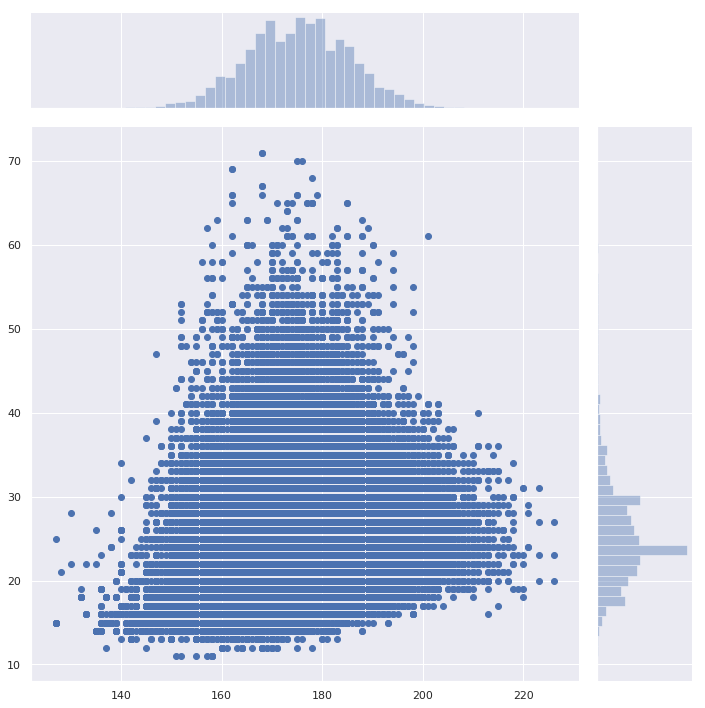

In [0]:
sb.jointplot(height_data, Age_data, height=10)

In [0]:
# Clean the NaN data from Medal column
Medal_cls = Medal_data.dropna(how='any')
print(Medal_cls.describe())
print(type(Medal_cls))

        Medal
count   39783
unique      3
top      Gold
freq    13372
<class 'pandas.core.frame.DataFrame'>


In [0]:
#merge region data and atheletic events data
merged_data = pd.merge(olympic_data, region_data, on="NOC", how="left")
merged_data_na = merged_data.dropna(how="any")
merged_data_na.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes
3680,2112,Abdullah Al-Rashidi,M,52.0,183.0,83.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,Individual Olympic Athletes,Individual Olympic Athletes
5075,2892,Ade Franci Alleyne-Forte,M,23.0,180.0,73.0,Trinidad and Tobago,TTO,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,Trinidad and Tobago
6517,3652,Svetlana Anastasovski-Obuina,F,19.0,176.0,65.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,Silver,Serbia,Yugoslavia
6518,3652,Svetlana Anastasovski-Obuina,F,23.0,176.0,65.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia


In [0]:
# for Extract gold Medals
goldMedals = merged_data[(merged_data.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [0]:
# Remove NaN data -> gold Medal 
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
gold_Medals_na = goldMedals.dropna(how = "any")
print(gold_Medals_na.head)

Distribution fo Gold Medals


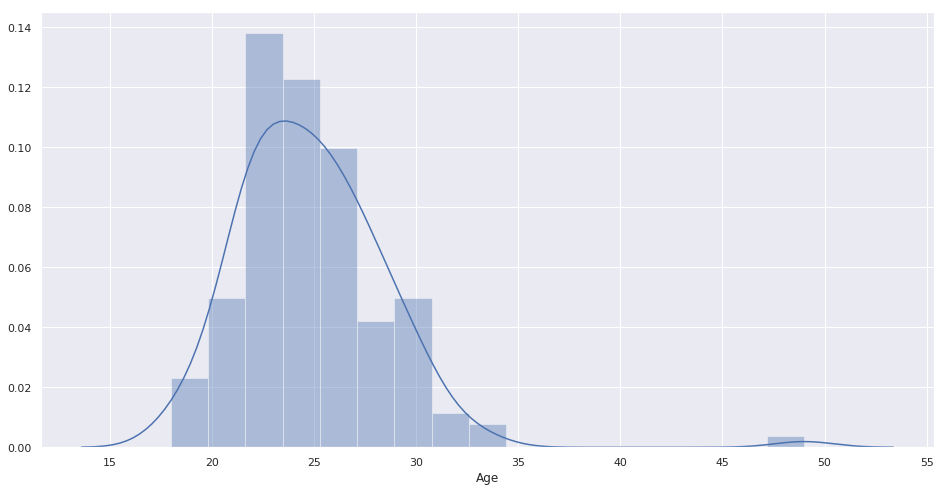

In [0]:
#show distribution of gold medals by Age
plt.figure(figsize=(16,8))
plt.tight_layout()
sb.distplot(gold_Medals_na['Age'])
print("Distribution fo Gold Medals")

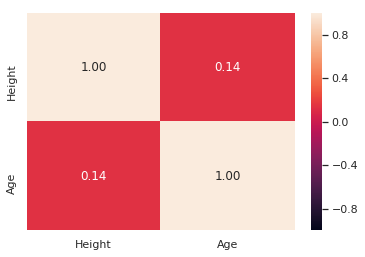

In [0]:
#It is not strong correlation between Age and Height 
jointDF = pd.concat([height_data, Age_data], axis = 1, join_axes=[Age_data.index])
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

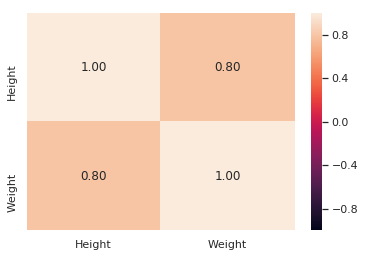

In [0]:
#showing confusion matrix between height and weight from Data include NaN
jointDF = pd.concat([height_data, weight_data], axis = 1, join_axes=[weight_data.index])
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

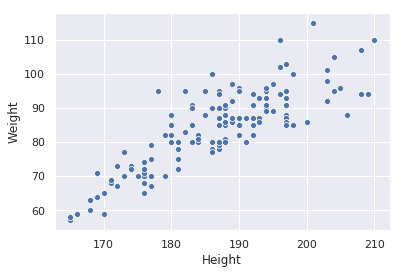

In [0]:
#showing Height and Weight from Gold Medals Data without NaN
sb.scatterplot(x = "Height", y = "Weight", data=gold_Medals_na)

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression(fit_intercept=True)
Height_na = pd.DataFrame(merged_data_na['Height'])
Weight_na = pd.DataFrame(merged_data_na['Weight'])


In [0]:
linreg.fit(Height_na, Weight_na)
x_fit = np.linspace(0,10)
y_fit = linreg.predict(Height_na)

ValueError: ignored

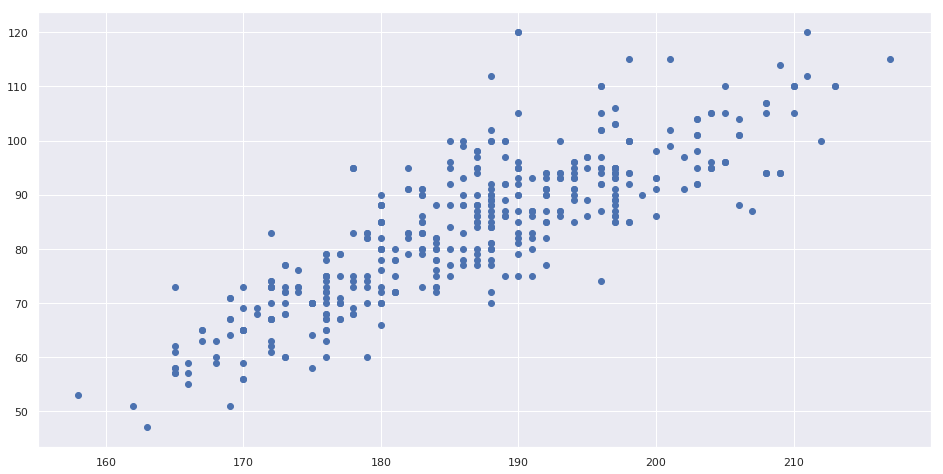

In [0]:
#Different from jupyter, intercepter_ -> fit_intercept 
regline_x = Height_na
#coef_ -> copy_X
regline_y = linreg.intercept_ + linreg.coef_ * Weight_na

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(Height_na, Weight_na)
plt.plot(x_fit, y_fit)